In [1]:
import numpy as np
import astropy.units as u

In [2]:
from astroquery.simbad import Simbad
customSimbad = Simbad()
customSimbad.remove_votable_fields('coordinates')
customSimbad.add_votable_fields('ra(d;A;ICRS;;)', 'dec(d;D;ICRS;;)')
result_table = customSimbad.query_objects(["NGC869", "NGC884"])
result_table.keep_columns(['MAIN_ID', 'RA_d_A_ICRS__', 'DEC_d_D_ICRS__'])
result_table.rename_column('MAIN_ID', 'ID')
result_table.rename_column('RA_d_A_ICRS__', 'RA')
result_table.rename_column('DEC_d_D_ICRS__', 'DEC')
result_table

ID,RA,DEC
,deg,deg
object,float64,float64
NGC 869,34.74100000,57.13400000
NGC 884,35.58400000,57.14900000


In [3]:
from astropy.coordinates import SkyCoord
coord = SkyCoord(ra=np.mean(result_table['RA']), dec=np.mean(result_table['DEC']), unit=(u.degree, u.degree) , frame='icrs')
width = u.Quantity(2, u.deg)
height = u.Quantity(2, u.deg)
#r = Gaia.query_object_async(coordinate=coord, width=width, height=height)
#r


In [125]:
from astroquery.gaia import Gaia
Gaia.MAIN_GAIA_TABLE = "gaiadr3.gaia_source"

query = f"""
SELECT 
--TOP 10
source_id, ra, dec, 
phot_g_mean_mag,
pmra, pmra_error, 
pmdec, pmdec_error, 
parallax, parallax_over_error,
astrometric_params_solved,
r_med_geo,
DISTANCE(ra, dec, {result_table[0]['RA']}, {result_table[0]['DEC']}) as distance_ngc_869,
DISTANCE(ra, dec, {result_table[1]['RA']}, {result_table[1]['DEC']}) as distance_ngc_884
FROM external.gaiaedr3_distance
JOIN {Gaia.MAIN_GAIA_TABLE} USING (source_id)
WHERE 
    --DISTANCE({coord.ra.degree}, {coord.dec.degree}, ra, dec) < {width.value}
    1 = CONTAINS(
        POINT('ICRS', ra, dec),
        BOX('ICRS', {coord.ra.degree}, {coord.dec.degree}, {width.value}, {height.value})
    )
    AND phot_g_mean_mag IS NOT NULL
    AND astrometric_params_solved >= 31
    --AND parallax_over_error > 1
"""
job = Gaia.launch_job_async(query, verbose = True)
r = job.get_results()
r.info()

Launched query: '
SELECT 
--TOP 10
source_id, ra, dec, 
phot_g_mean_mag,
pmra, pmra_error, 
pmdec, pmdec_error, 
parallax, parallax_over_error,
astrometric_params_solved,
r_med_geo,
DISTANCE(ra, dec, 34.741, 57.134) as distance_ngc_869,
DISTANCE(ra, dec, 35.584, 57.149) as distance_ngc_884
FROM external.gaiaedr3_distance
JOIN gaiadr3.gaia_source USING (source_id)
WHERE 
    --DISTANCE(35.1625, 57.1415, ra, dec) < 2.0
    1 = CONTAINS(
        POINT('ICRS', ra, dec),
        BOX('ICRS', 35.1625, 57.1415, 2.0, 2.0)
    )
    AND phot_g_mean_mag IS NOT NULL
    AND astrometric_params_solved >= 31
    --AND parallax_over_error > 1
'
------>https
host = gea.esac.esa.int:443
context = /tap-server/tap/async
Content-type = application/x-www-form-urlencoded
303 303
[('Date', 'Sat, 04 Feb 2023 08:35:03 GMT'), ('Server', 'Apache/2.4.6 (CentOS) OpenSSL/1.0.2k-fips mod_jk/1.2.43'), ('Cache-Control', 'no-cache, no-store, max-age=0, must-revalidate'), ('Pragma', 'no-cache'), ('Expires', '0'), ('X-XSS

In [123]:
from astroquery.gaia import Gaia
Gaia.MAIN_GAIA_TABLE = "gaiadr3.gaia_source"

query = f"""
SELECT 
--TOP 10
source_id, ra, dec, 
phot_g_mean_mag,
pmra, pmra_error, 
pmdec, pmdec_error, 
parallax, parallax_over_error,
astrometric_params_solved,
r_med_geo,
DISTANCE(ra, dec, {result_table[0]['RA']}, {result_table[0]['DEC']}) as distance_ngc_869,
DISTANCE(ra, dec, {result_table[1]['RA']}, {result_table[1]['DEC']}) as distance_ngc_884
FROM external.gaiaedr3_distance
JOIN {Gaia.MAIN_GAIA_TABLE} USING (source_id)
WHERE 
    1 = CONTAINS(
        POINT('ICRS', ra, dec),
        BOX('ICRS', {coord.ra.degree}, {coord.dec.degree}, {width.value}, {height.value})
    )
    AND phot_g_mean_mag IS NOT NULL
    AND astrometric_params_solved >= 31
    AND parallax < 0
"""
job = Gaia.launch_job_async(query, verbose = True)
baddist = job.get_results()
baddist.info()

Launched query: '
SELECT 
--TOP 10
source_id, ra, dec, 
phot_g_mean_mag,
pmra, pmra_error, 
pmdec, pmdec_error, 
parallax, parallax_over_error,
astrometric_params_solved,
r_med_geo,
DISTANCE(ra, dec, 34.741, 57.134) as distance_ngc_869,
DISTANCE(ra, dec, 35.584, 57.149) as distance_ngc_884
FROM external.gaiaedr3_distance
JOIN gaiadr3.gaia_source USING (source_id)
WHERE 
    1 = CONTAINS(
        POINT('ICRS', ra, dec),
        BOX('ICRS', 35.1625, 57.1415, 2.0, 2.0)
    )
    AND phot_g_mean_mag IS NOT NULL
    AND astrometric_params_solved >= 31
    AND parallax < 0
'
------>https
host = gea.esac.esa.int:443
context = /tap-server/tap/async
Content-type = application/x-www-form-urlencoded
303 303
[('Date', 'Sat, 04 Feb 2023 08:33:01 GMT'), ('Server', 'Apache/2.4.6 (CentOS) OpenSSL/1.0.2k-fips mod_jk/1.2.43'), ('Cache-Control', 'no-cache, no-store, max-age=0, must-revalidate'), ('Pragma', 'no-cache'), ('Expires', '0'), ('X-XSS-Protection', '1; mode=block'), ('X-Frame-Options', 'SAMEORIG

In [124]:
baddist

source_id,ra,dec,phot_g_mean_mag,pmra,pmra_error,pmdec,pmdec_error,parallax,parallax_over_error,astrometric_params_solved,r_med_geo,distance_ngc_869,distance_ngc_884
,deg,deg,mag,mas / yr,mas / yr,mas / yr,mas / yr,mas,,,pc,,
int64,float64,float64,float32,float64,float32,float64,float32,float64,float32,int16,float32,float64,float64
458579538007249536,34.162798158518044,57.44406317065738,19.93585,-3.942098557891451,0.4295741,-1.954022948152846,0.48566443,-0.06464951388317562,-0.13338064,95,3492.562,0.4401914848451413,0.8225834725039421
458585821543734016,34.162852445955764,57.5160070068299,20.782854,-0.2000035654288511,2.3731794,0.24412514802481244,2.0338128,-3.1686548423583476,-1.683312,95,3320.981,0.4933037478142597,0.8503363280795202
458538306318553216,34.1629372612654,57.06874654992992,19.649588,-0.024200508880179,0.27764562,-0.19695098863621502,0.3160163,-0.127111332948506,-0.34628794,31,3373.0203,0.32068530785911803,0.7758475783340641
458733985038672256,34.16301697798415,57.82120610004895,19.37522,0.06430233387867645,0.30208683,-0.05999922002443121,0.31421182,-0.4346099851808602,-1.3000107,95,4804.1255,0.7541893989820461,1.0174389664682546
458525726359000192,34.16323396721918,56.842462865919,19.676483,-2.321638061555901,0.29456088,0.9821034685235005,0.32449436,-0.5343602489373882,-1.4404022,31,4517.2407,0.4290383496473844,0.8323718246212075
458686946547849600,34.163276906926235,57.79362856893747,20.519844,-1.373733893073558,1.0112444,-0.22407713203999738,0.9296785,-0.7102450413691899,-0.67688227,95,3672.0579,0.7291406247356023,0.9995491658647196
458538684285378176,34.16336652632954,57.08305892709386,19.57417,-0.627980440845043,0.27814904,-0.9811997079134986,0.34076062,-0.020335550245739242,-0.057837036,95,4233.3403,0.3177919388825363,0.7741174079448478
458532430804474496,34.16339482857522,56.92536426924912,20.628746,0.7829139299216619,0.8324775,0.11843925950944165,0.9126914,-0.8010950795030017,-0.7400797,95,3551.346,0.3772719033572946,0.8046285970435599


In [57]:
from astropy.table import Table
r.write('../data/Cluster.hdf5', format='hdf5', overwrite=True, append=True, path="/gaia/2deg")

In [21]:
from astropy.table import Table
r=Table.read('../data/Cluster.hdf5', format='hdf5', path='gaia-2deg')

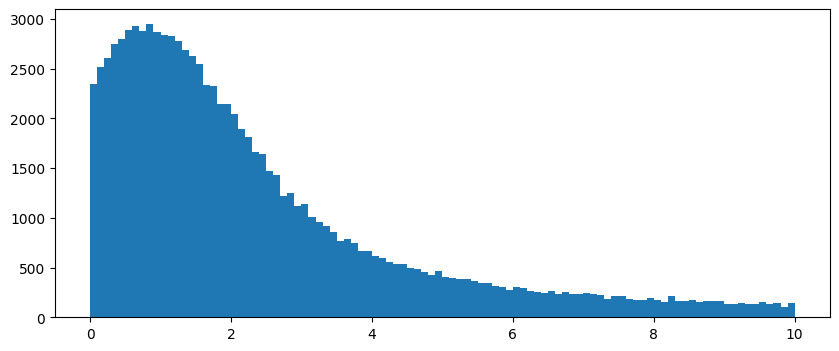

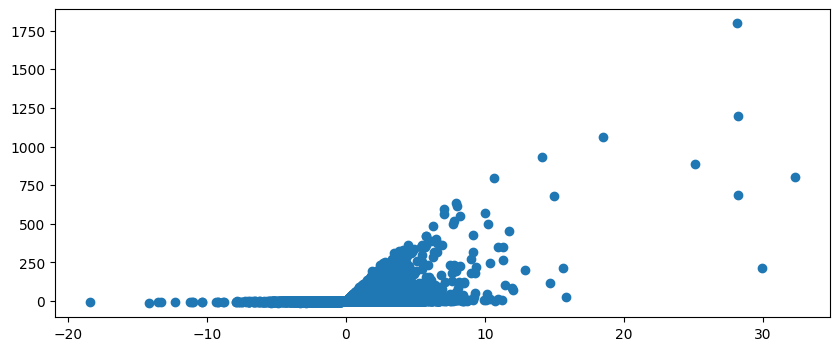

In [6]:
import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"] = (10,4)
n, bins, patches = plt.hist(r['parallax_over_error'], bins=100, range= (0,10))
#n, bins, patches = plt.hist(r['pmdec'],500)
plt.show()

plt.scatter(r['parallax'], r['parallax_over_error'])
plt.show()

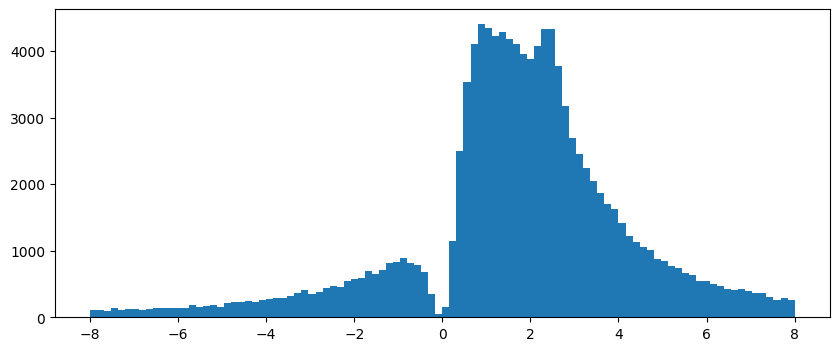

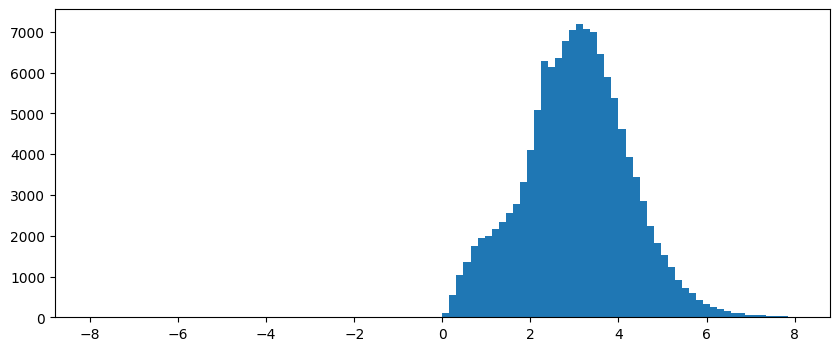

In [130]:
import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"] = (10,4)
n, bins, patches = plt.hist(1/r['parallax'], bins=100, range=(-8,8))
#n, bins, patches = plt.hist(r['pmdec'],500)
plt.show()

n, bins, patches = plt.hist(r['r_med_geo']/1000, bins=100, range=(-8,8))
plt.show()

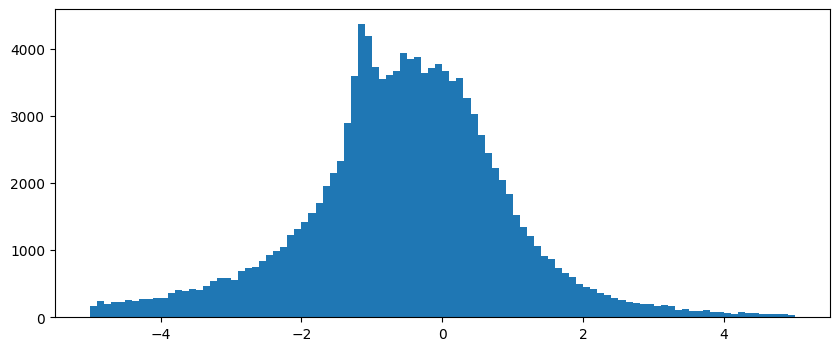

In [8]:
plt.rcParams["figure.figsize"] = (10,4)
n, bins, patches = plt.hist(r['pmdec'], bins=100,range=(-5,5))
#n, bins, patches = plt.hist(r['pmdec'],500)
plt.show()

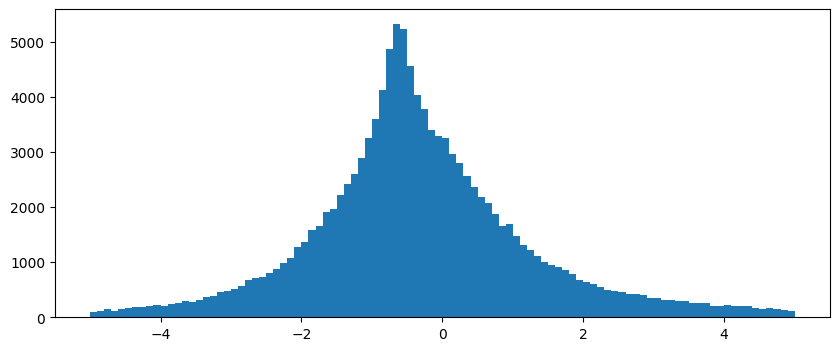

In [9]:
plt.rcParams["figure.figsize"] = (10,4)
n, bins, patches = plt.hist(r['pmra'], bins=100,range=(-5,5))
#n, bins, patches = plt.hist(r['pmdec'],500)
plt.show()

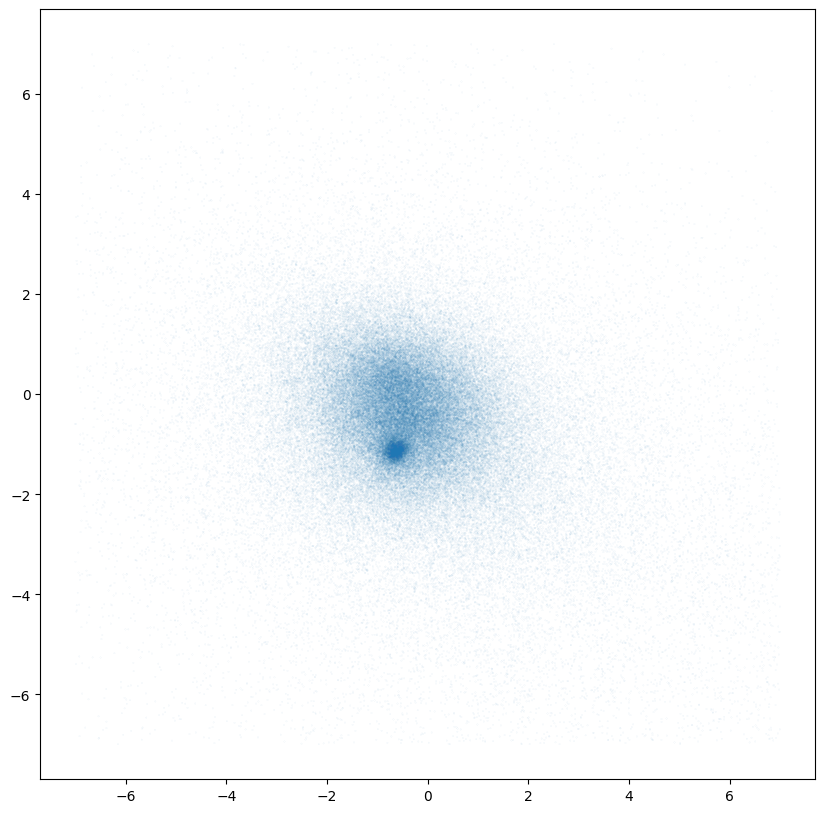

In [10]:
from numpy import ma
plt.rcParams["figure.figsize"] = (10,10)
s = [0.0005 for a in r['pmra']]
plt.scatter(ma.masked_outside(r['pmra'],-7,7), ma.masked_outside(r['pmdec'],-7,7), s)
plt.show()

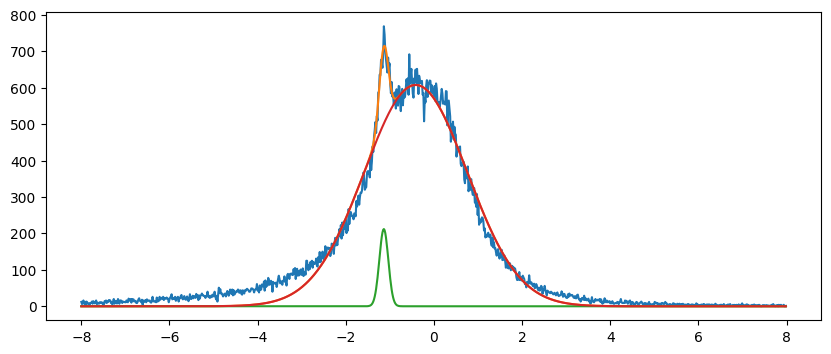

Both actual and predicted relative reductions in the sum of squares
  are at most 0.000000


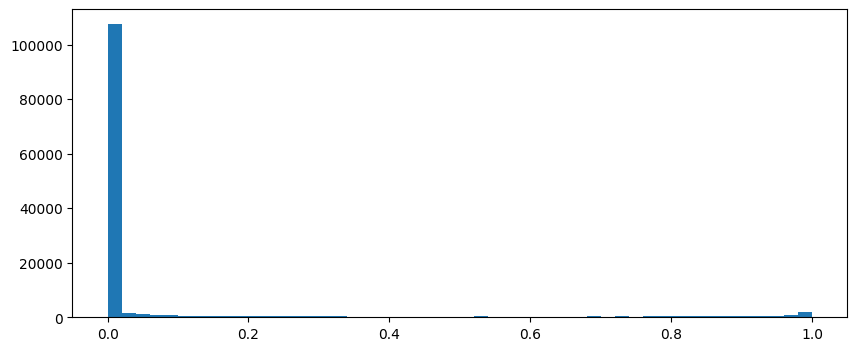

In [57]:
import warnings
from astropy.modeling import models, fitting

pmdata = r['pmdec']

fit = fitting.LevMarLSQFitter()
heights, bins = np.histogram(pmdata, bins=1000, range=(-8,8))

background = models.Gaussian1D(800, 0, 2, name="background")
cluster = models.Gaussian1D(1000, -1, 0.1, name="cluster")
gg_init = background + cluster

fitted_gaussian = fit(gg_init, bins[:-1], heights, maxiter=1000)

plt.rcParams["figure.figsize"] = (10,4)
plt.plot(bins[:-1], heights)
plt.plot(bins[:-1], fitted_gaussian(bins[:-1]))
plt.plot(bins[:-1], fitted_gaussian['cluster'](bins[:-1]))
plt.plot(bins[:-1], fitted_gaussian['background'](bins[:-1]))
plt.show()

print(fit.fit_info['message'])

cluster_model = fitted_gaussian['cluster'] | models.Scale(1/(fitted_gaussian['cluster'].amplitude))

pmdec_prob = cluster_model(r['pmdec'])
plt.hist(pmdec_prob, bins=50)
plt.show()

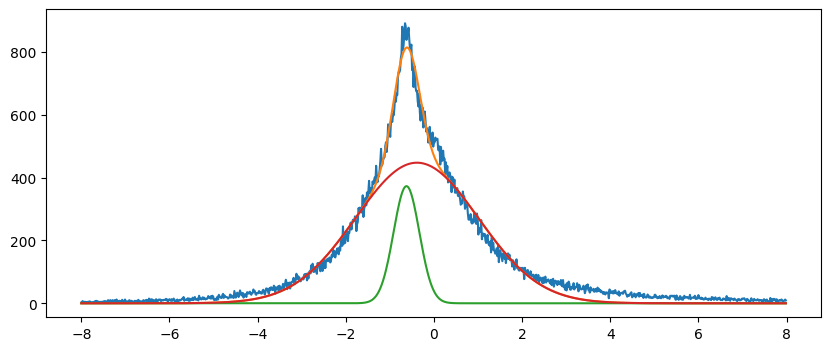

Both actual and predicted relative reductions in the sum of squares
  are at most 0.000000


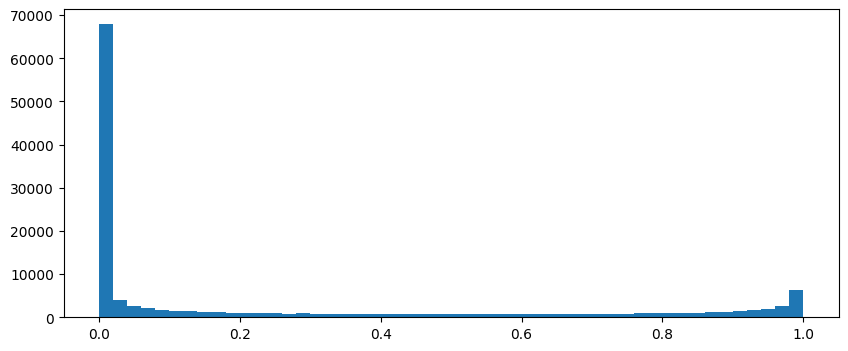

In [58]:
import warnings
from astropy.modeling import models, fitting

pmdata = r['pmra']

heights, bins = np.histogram(pmdata, bins=1000, range=(-8,8))


background = models.Gaussian1D(600, 0, 2, name="background")
cluster = models.Gaussian1D(1000, -0.5, 0.1, name="cluster")
gg_init = background + cluster


fit = fitting.LevMarLSQFitter()
fitted_gaussian = fit(gg_init, bins[:-1], heights, maxiter=1000 )

plt.rcParams["figure.figsize"] = (10,4)
plt.plot(bins[:-1], heights)
plt.plot(bins[:-1], fitted_gaussian(bins[:-1]))
plt.plot(bins[:-1], fitted_gaussian['cluster'](bins[:-1]))
plt.plot(bins[:-1], fitted_gaussian['background'](bins[:-1]))


#n, bins, patches = plt.hist(r['pmdec'], bins=100,range=(-5,5))
#n, bins, patches = plt.hist(r['pmdec'],500)
plt.show()
print(fit.fit_info['message'])


cluster_model = fitted_gaussian['cluster'] | models.Scale(1/(fitted_gaussian['cluster'].amplitude))

pmra_prob = cluster_model(r['pmra'])
plt.hist(pmra_prob, bins=50)
plt.show()

1992 1992 1992 1992 1992


/home/mtauraso/astr511-hw2/.snakemake/conda/610fc0a2b41a034d05f04272a0716d61_/lib/python3.9/site-packages/numpy/ma/core.py:2820: UserWarning: Warning: converting a masked element to nan.
  _data = np.array(data, dtype=dtype, copy=copy,


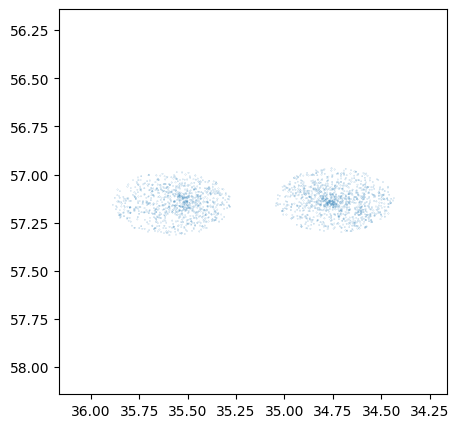

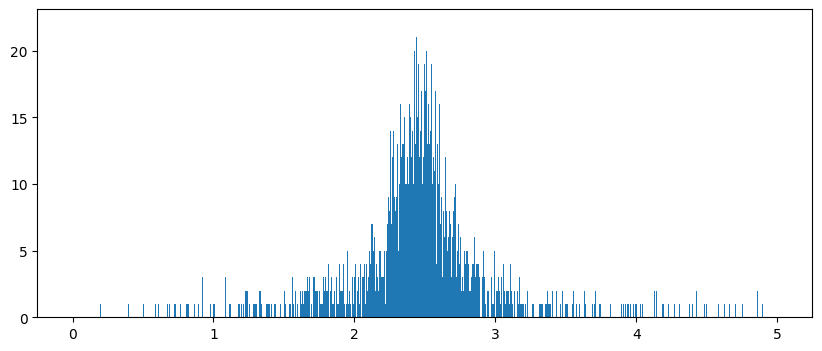

6194 6194 6194 6194 6194


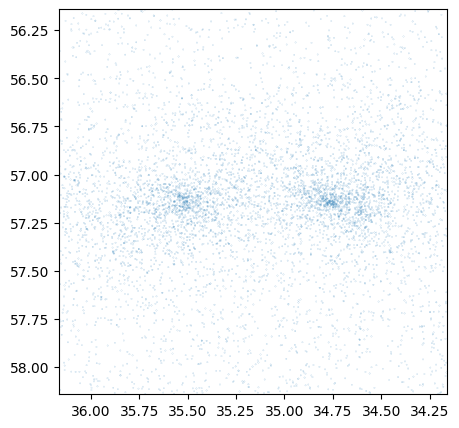

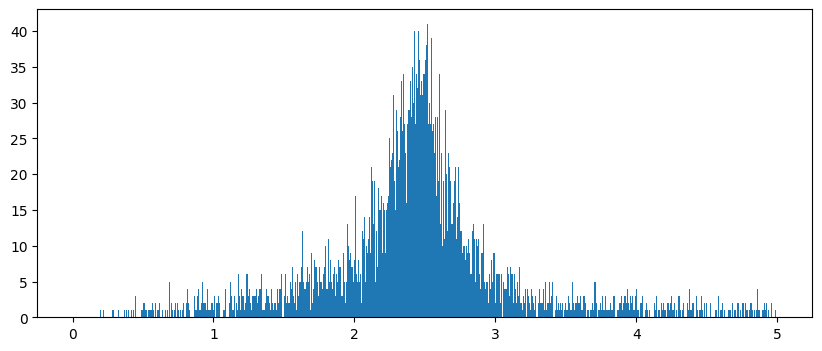

In [59]:
def sky_scatter(r, mask_criteria):
    ra = np.ma.array(r['ra'], mask=mask_criteria)
    dec = np.ma.array(r['dec'], mask=mask_criteria)
    mags = np.ma.array(r['phot_g_mean_mag'], mask=mask_criteria)
    parallax = np.ma.array(r['parallax'], mask=mask_criteria)
    distances = np.ma.array(1/r['parallax'], mask=mask_criteria)

    print(ma.count(ra), ma.count(dec), ma.count(mags), ma.count(parallax), ma.count(distances))

    s = [mag**(-1.75) for mag in mags]
    plt.rcParams["figure.figsize"] = (5,5)
    plt.scatter(ra, dec, s)
    plt.ylim((coord.dec + height/2).value, (coord.dec- height/2).value)
    plt.xlim((coord.ra + width/2).value, (coord.ra - width/2).value)
    plt.show()
    
def dist_hist(r, mask_criteria):
    distances = np.ma.array(1/r['parallax'], mask=mask_criteria)
#plt.rcParams["figure.figsize"] = (10,4)
#plt.hist(1/r['parallax'], bins=100, range=(0,5))
#n, bins, patches = plt.hist(r['pmdec'],500)
#plt.show()
    plt.rcParams["figure.figsize"] = (10,4)
    plt.hist(distances.compressed(), bins=1000, range=(0,5))
    #n, bins, patches = plt.hist(r['pmdec'],500)
    plt.show()

member_prob = (pmra_prob + pmdec_prob)/2
velocity_member = [(prob > 0.6) for prob in member_prob]
ngc_869_center = [dist < (1.0/6.0) for dist in r['distance_ngc_869']]
ngc_884_center = [dist < (1.0/6.0) for dist in r['distance_ngc_884']]

mask_criteria = ~np.logical_and(velocity_member, np.logical_or(ngc_869_center, ngc_884_center))

sky_scatter(r, mask_criteria)
dist_hist(r, mask_criteria)

mask_criteria = np.logical_not(velocity_member)

sky_scatter(r, mask_criteria)
dist_hist(r, mask_criteria)




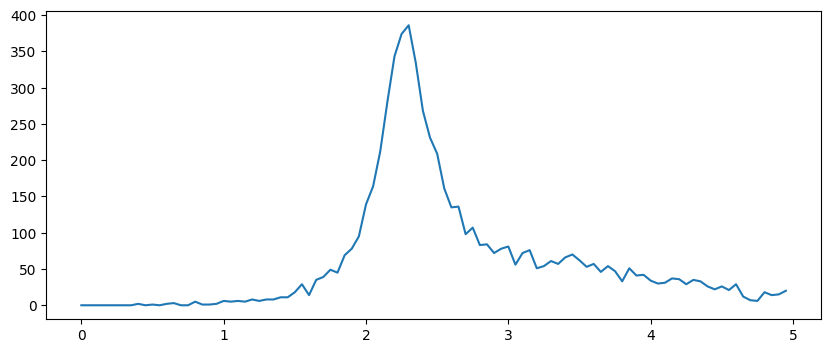

Model: Gaussian1D
Name: cluster
Inputs: ('x',)
Outputs: ('y',)
Model set size: 1
Parameters:
        amplitude            mean              stddev      
    ----------------- ------------------ ------------------
    323.1134300227562 2.3036941614006636 0.2601636713588868


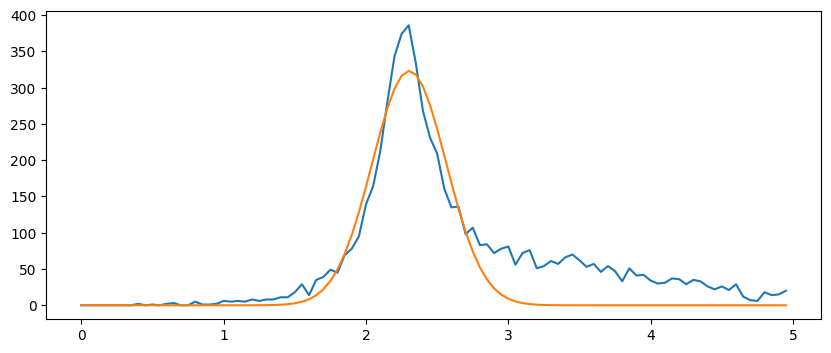

Both actual and predicted relative reductions in the sum of squares
  are at most 0.000000


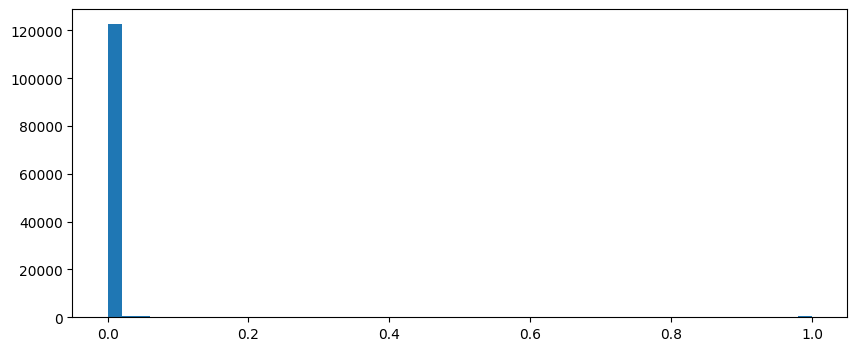

In [138]:
import warnings
from astropy.modeling import models, fitting


# Get at distance by starting with our probable cluster members and then looking at parallax among them
velocity_member_prob = (pmra_prob + pmdec_prob)/2
velocity_member = [(prob > 0.6) for prob in velocity_member_prob]

ngc_869_center = [dist < (1.0/6.0) for dist in r['distance_ngc_869']]
ngc_884_center = [dist < (1.0/6.0) for dist in r['distance_ngc_884']]

#mask_criteria = ~np.logical_and(velocity_member, np.logical_or(ngc_869_center, ngc_884_center))

mask_criteria = np.logical_not(velocity_member)
#distances = np.ma.array(1/r['parallax'], mask=mask_criteria)
distances = np.ma.array(r['r_med_geo']/1000, mask=mask_criteria)


heights, bins = np.histogram(distances.compressed(), bins=100, range=(0,5))
plt.plot(bins[:-1], heights)
plt.show()

gg_init = models.Gaussian1D(350, 2.5, 1, name="cluster")


fit = fitting.LevMarLSQFitter()
fitted_gaussian = fit(gg_init, bins[:-1], heights, maxiter=1000 )

print(fitted_gaussian)

plt.rcParams["figure.figsize"] = (10,4)
plt.plot(bins[:-1], heights)
plt.plot(bins[:-1], fitted_gaussian(bins[:-1]))

#n, bins, patches = plt.hist(r['pmdec'], bins=100,range=(-5,5))
#n, bins, patches = plt.hist(r['pmdec'],500)
plt.show()
print(fit.fit_info['message'])


cluster_model = fitted_gaussian | models.Scale(1/(fitted_gaussian.amplitude))

dist_prob = cluster_model(r['parallax'])
plt.hist(dist_prob, bins=50)
plt.show()

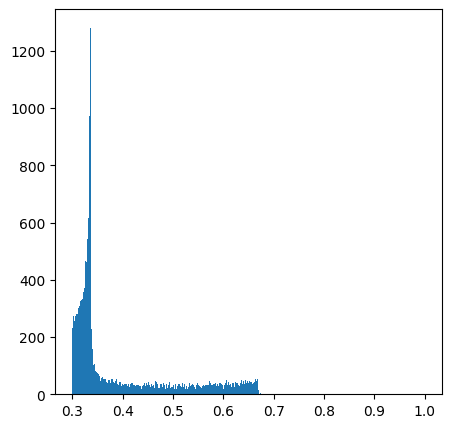

1960 1960 1960 1960 1960


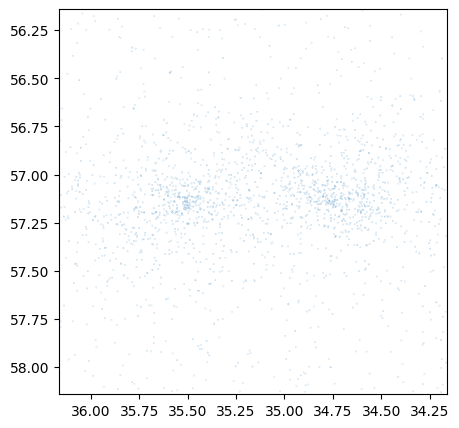

In [119]:
member_prob = (pmra_prob + pmdec_prob + dist_prob)/3
plt.hist(member_prob, bins=500, range=(0.3,1.0))
plt.show()

full_member = [(prob > 0.6) for prob in member_prob]
mask_criteria = np.logical_not(full_member)

sky_scatter(r, mask_criteria)


1081


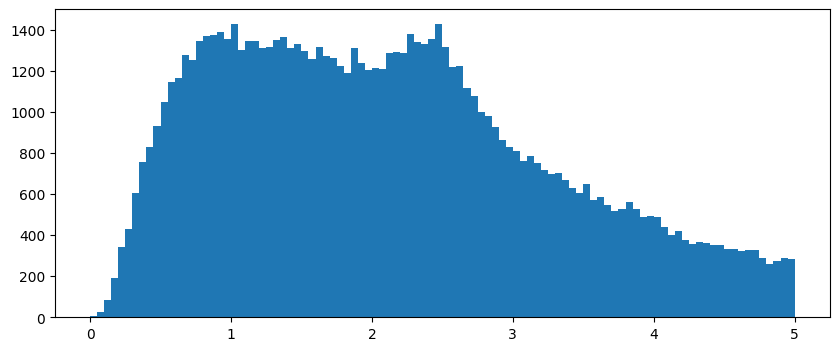

In [102]:
member_sort = [(prob < 0.6) for prob in member_prob]

ngc_869_sort = [dist > (1.0/6.0) for dist in r['distance_ngc_869']]

dist = np.ma.array(1/r['parallax'], mask=np.logical_or(ngc_869_sort, member_sort))

print(ma.count(dist))

plt.rcParams["figure.figsize"] = (10,4)
plt.hist(dist, bins=100, range=(0,5))
#n, bins, patches = plt.hist(r['pmdec'],500)
plt.show()

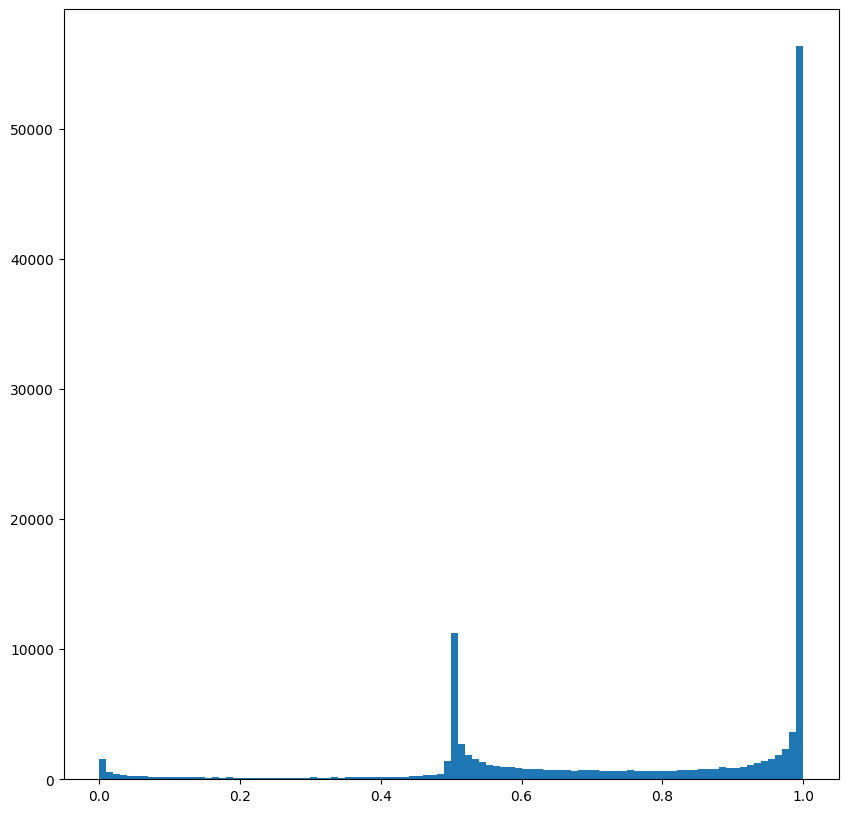

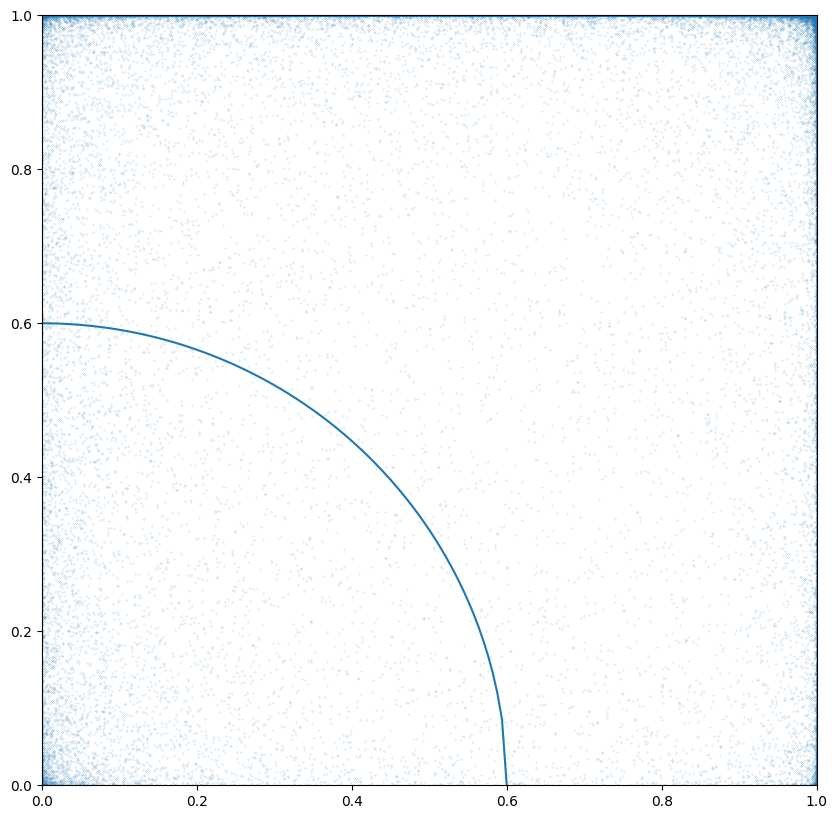

/tmp/ipykernel_7008/2694585616.py:27: RuntimeWarning: invalid value encountered in sqrt
  Y = np.sqrt((0.7)*2 - X**2)


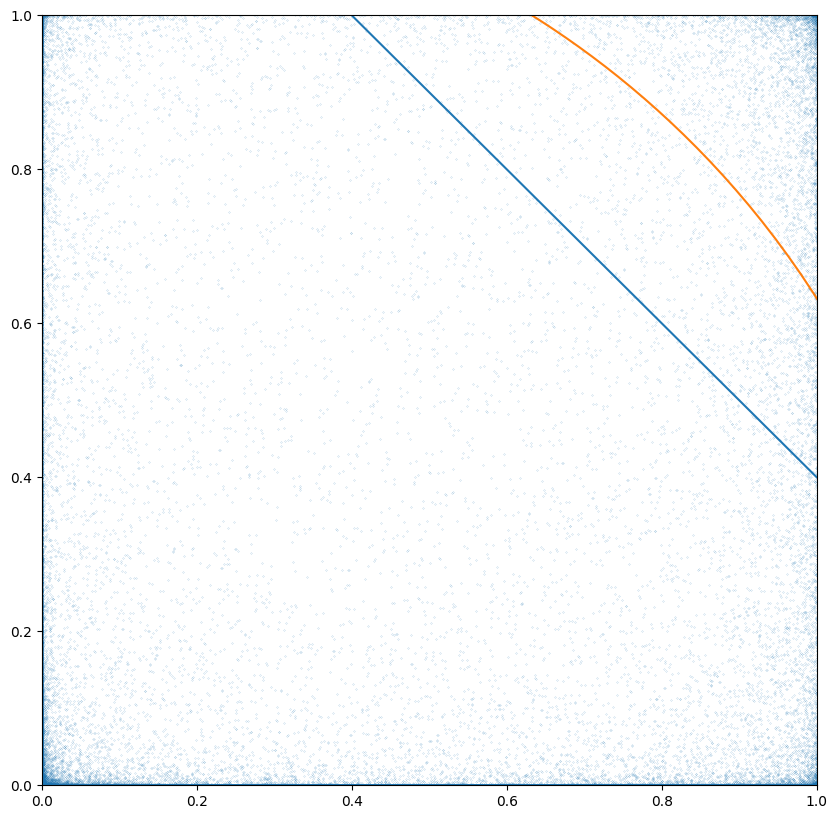

In [111]:
member_prob = ((1-pmra_prob)**2 + (1-pmdec_prob)**2)/2
plt.hist(member_prob, bins=100)
plt.show()

plt.rcParams["figure.figsize"] = (10,10)
plt.scatter((1-pmra_prob), (1-pmdec_prob), .01)
X = np.linspace(0,1,num=100)
Y = (1-0.7)*2 - X
#plt.plot(X,Y)

X = np.linspace(0,0.6,num=100)
Y = np.sqrt((2*(1-0.7))**2 - X**2)
plt.plot(X,Y)

plt.xlim(0,1)
plt.ylim(0,1)
plt.show()

plt.rcParams["figure.figsize"] = (10,10)
plt.scatter(pmra_prob, pmdec_prob, .01)

X = np.linspace(0,1,num=100)
Y = 0.7*2 -X
plt.plot(X,Y)

X = np.linspace(0,np.sqrt(0.7)*2,num=100)
Y = np.sqrt((0.7)*2 - X**2)
plt.plot(X,Y)


plt.xlim(0,1)
plt.ylim(0,1)
plt.show()

#_,_,_,_ = plt.hist2d(1-pmra_prob, 1-pmdec_prob, bins=100, rang)
#plt.show()


In [21]:
from astroquery.gaia import Gaia
gaiadr3_table = Gaia.load_table('gaiadr3.gaia_source')
print(gaiadr3_table)
[f'{c.name}  {c.description}' for c in gaiadr3_table.columns]

Retrieving table 'gaiadr3.gaia_source'
TAP Table name: gaiadr3.gaiadr3.gaia_source
Description: This table has an entry for every Gaia observed source as published with this data release. It contains the basic source parameters, in their final state as processed by the Gaia Data Processing and Analysis Consortium from the raw data coming from the spacecraft. The table is complemented with others containing information specific to certain kinds of objects (e.g.~Solar--system objects, non--single stars, variables etc.) and value--added processing (e.g.~astrophysical parameters etc.). Further array data types (spectra, epoch measurements) are presented separately via Datalink resources.
Num. columns: 152


['solution_id  Solution Identifier',
 'designation  Unique source designation (unique across all Data Releases)',
 'source_id  Unique source identifier (unique within a particular Data Release)',
 'random_index  Random index for use when selecting subsets',
 'ref_epoch  Reference epoch',
 'ra  Right ascension',
 'ra_error  Standard error of right ascension',
 'dec  Declination',
 'dec_error  Standard error of declination',
 'parallax  Parallax',
 'parallax_error  Standard error of parallax',
 'parallax_over_error  Parallax divided by its standard error',
 'pm  Total proper motion',
 'pmra  Proper motion in right ascension direction',
 'pmra_error  Standard error of proper motion in right ascension direction',
 'pmdec  Proper motion in declination direction',
 'pmdec_error  Standard error of proper motion in declination direction',
 'ra_dec_corr  Correlation between right ascension and declination',
 'ra_parallax_corr  Correlation between right ascension and parallax\t\t',
 'ra_pmra_cor

In [22]:
from astroquery.gaia import Gaia
gaiadr3_table = Gaia.load_table('gaiadr3.gaia_source_lite')
print(gaiadr3_table)
[f'{c.name}  {c.description}' for c in gaiadr3_table.columns]

Retrieving table 'gaiadr3.gaia_source_lite'
TAP Table name: gaiadr3.gaiadr3.gaia_source_lite
Description: This is a column-wise subset of the gaia_source table named gaia_source_lite. This table has an entry for every Gaia observed source as published with this data release. It contains the basic source parameters, in their final state as processed by the Gaia Data Processing and Analysis Consortium from the raw data coming from the spacecraft. The table is complemented with others containing information specific to certain kinds of objects (e.g.~Solar--system objects, non--single stars, variables etc.) and value--added processing (e.g.~astrophysical parameters etc.). Further array data types (spectra, epoch measurements) are presented separately via Datalink resources.
Num. columns: 51


['source_id  Unique source identifier (unique within a particular Data Release)',
 'random_index  Random index for use when selecting subsets',
 'ra  Right ascension',
 'dec  Declination',
 'parallax  Parallax',
 'parallax_error  Standard error of parallax',
 'parallax_over_error  Parallax divided by its standard error',
 'pmra  Proper motion in right ascension direction',
 'pmra_error  Standard error of proper motion in right ascension direction',
 'pmdec  Proper motion in declination direction',
 'pmdec_error  Standard error of proper motion in declination direction',
 'astrometric_params_solved  Which parameters have been solved for?',
 'pseudocolour  Astrometrically estimated pseudocolour of the source',
 'pseudocolour_error  Standard error of the pseudocolour of the source',
 'ipd_frac_multi_peak  Percent of successful-IPD windows with more than one peak',
 'ipd_frac_odd_win  Percent of transits with truncated windows or multiple gate',
 'ruwe  Renormalised unit weight error',
 'p

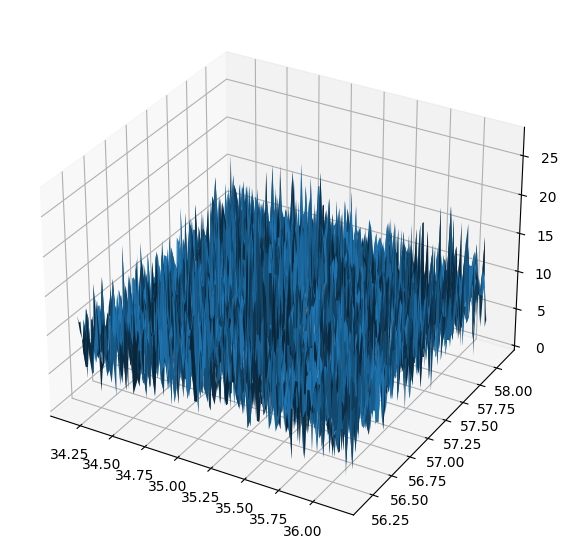

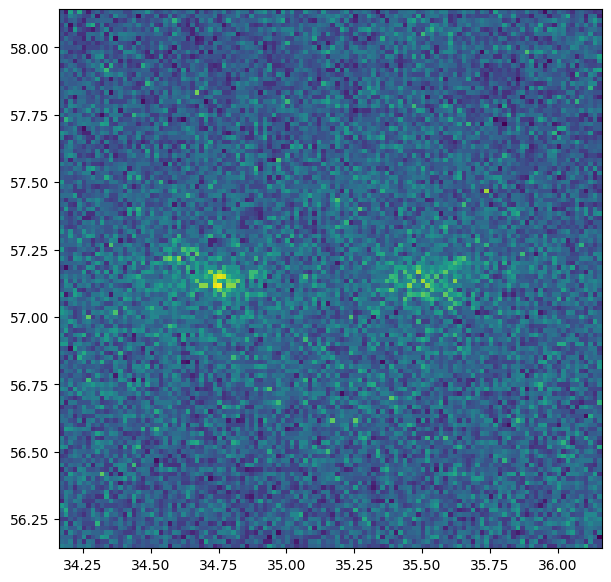

    ID         RA         DEC     
              deg         deg     
--------- ----------- ------------
NGC   869 34.74100000  57.13400000


ValueError: Number of data sets (y or z array) is expected to equal the number of parameter sets

In [83]:
import warnings
from astropy.modeling import models, fitting


#s = [mag**(-1.75) for mag in r['phot_g_mean_mag']]
#plt.scatter(r['ra'], r['dec'], s)
#plt.show()
plt.rcParams["figure.figsize"] = (7,7)
heights, xbins, ybins = np.histogram2d(r['ra'], r['dec'], bins=[120,120])

fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
x,y = np.meshgrid(xbins[:-1], ybins[:-1])
ax.plot_surface(x, y, heights)
plt.show()

heights, xbins, ybins, image = plt.hist2d(r['ra'], r['dec'], bins=[120,120])
plt.show()



print(result_table[0])
result_table[1]

ngc869 = models.Gaussian2D(1, result_table[0]['RA'], result_table[0]['DEC'])
ngc884 = models.Gaussian2D(1, result_table[1]['RA'], result_table[1]['DEC'])
bothclusters = ngc869 + ngc884

fit = fitting.LevMarLSQFitter()
fitted_gaussian = fit(bothclusters, xbins[:-1], ybins[:-1], heights, maxiter=1000 )

plt.rcParams["figure.figsize"] = (10,4)
plt.plot(xbins[:-1], ybins[:-1], heights)
plt.plot(bins[:-1], fitted_gaussian(bins[:-1]))
plt.plot(bins[:-1], fitted_gaussian['cluster'](bins[:-1]))
plt.plot(bins[:-1], fitted_gaussian['background'](bins[:-1]))


data = r['distance_ngc_869']
heights, bins = np.histogram(data, bins=1000, range=(-1,4))
plt.plot(bins[:-1], heights)
plt.show()


data = r['distance_ngc_884']
heights, bins = np.histogram(data, bins=1000, range=(-1,4))
plt.plot(bins[:-1], heights)
plt.show()


